In [114]:
import pandas as pd
from rich import print as rprint
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np


     ---------------------------------------- 9.2/9.2 MB 932.9 kB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 4.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [153]:
df = pd.read_csv("trips.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  663 non-null    object 
 1   Product Type          637 non-null    object 
 2   Trip or Order Status  663 non-null    object 
 3   Request Time          663 non-null    object 
 4   Begin Trip Time       663 non-null    object 
 5   Begin Trip Lat        631 non-null    float64
 6   Begin Trip Lng        631 non-null    float64
 7   Begin Trip Address    631 non-null    object 
 8   Dropoff Time          663 non-null    object 
 9   Dropoff Lat           631 non-null    float64
 10  Dropoff Lng           631 non-null    float64
 11  Dropoff Address       645 non-null    object 
 12  Distance (miles)      663 non-null    float64
 13  Fare Amount           663 non-null    float64
 14  Fare Currency         663 non-null    object 
dtypes: float64(6), object(9

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency
0,Sao Luis,UberX,COMPLETED,2023-03-03 22:13:49 +0000 UTC,2023-03-03 22:16:32 +0000 UTC,-2.501724,-44.291040,"Rua dos Azulões, Edifício Office Tower - Jardi...",2023-03-03 22:23:21 +0000 UTC,-2.504354,-44.287350,"Rua Monção - São Luís - MA, 65075-780",0.90,8.97,BRL
1,Sao Luis,UberX,COMPLETED,2023-02-24 19:33:34 +0000 UTC,2023-02-24 19:39:45 +0000 UTC,-2.504417,-44.287395,"Renascença, 2 - São Luís - MA, 65075-220",2023-02-24 19:50:22 +0000 UTC,-2.484986,-44.246975,"Caolho Av. Copacabana, 2 - Residencial Parati ...",3.63,14.94,BRL
2,Sao Luis,UberX,CANCELED,2023-02-24 19:30:13 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,-2.510760,-44.287450,"Av. Prof. Carlos Cunha, S/N - Jaracaty - São L...",1970-01-01 00:00:00 +0000 UTC,-2.509680,-44.285980,"Caolho Av. Copacabana, 2 - Residencial Parati ...",0.00,0.00,BRL
3,Sao Luis,Flash Moto,COMPLETED,2023-02-22 18:20:12 +0000 UTC,2023-02-22 18:42:00 +0000 UTC,-2.504433,-44.287334,"Renascença, 2 - São Luís - MA, 65075-220",2023-02-22 18:55:06 +0000 UTC,-2.534411,-44.222515,"Av. Um - COHAB Anil I, São Luís - MA, 65066-62...",6.04,12.50,BRL
4,Sao Luis,UberX,COMPLETED,2023-02-22 17:52:18 +0000 UTC,2023-02-22 17:55:34 +0000 UTC,-2.504349,-44.287380,"R. Monção, 243 - Vila Dom Luis, São Luís - MA,...",2023-02-22 18:08:17 +0000 UTC,-2.534395,-44.222500,"Av. Um - COHAB Anil I, São Luís - MA, 65066-62...",6.03,19.98,BRL


In [154]:
df_selected = df.loc[:, ['Product Type', 'Trip or Order Status', 'Begin Trip Time', 'Distance (miles)', 'Fare Amount']]\
                .rename(columns={'Product Type': 'Type',
                                 'Trip or Order Status': 'Status',
                                 'Begin Trip Time': 'BeginTime',
                                 'Fare Amount': 'Price',
                                 'Distance (miles)': 'Distance_km'})
df_completed = df_selected.query(
    'Status == "COMPLETED"').drop(['Status'], axis=1)
df_completed.info()
df_completed.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 0 to 662
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         563 non-null    object 
 1   BeginTime    563 non-null    object 
 2   Distance_km  563 non-null    float64
 3   Price        563 non-null    float64
dtypes: float64(2), object(2)
memory usage: 22.0+ KB


,Type,BeginTime,Distance_km,Price
0,UberX,2023-03-03 22:16:32 +0000 UTC,0.90,8.97
1,UberX,2023-02-24 19:39:45 +0000 UTC,3.63,14.94
3,Flash Moto,2023-02-22 18:42:00 +0000 UTC,6.04,12.50
4,UberX,2023-02-22 17:55:34 +0000 UTC,6.03,19.98
5,UberX,2023-02-19 21:47:22 +0000 UTC,6.16,22.95


<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 0 to 662
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         563 non-null    object 
 1   BeginTime    563 non-null    object 
 2   Distance_km  563 non-null    float64
 3   Price        563 non-null    float64
dtypes: float64(2), object(2)
memory usage: 22.0+ KB


In [101]:
df_completed.loc[:,'Distance_km'] = round(df_completed['Distance_km']/0.6214,2)
df_completed.head()

,Type,BeginTime,Distance_km,Price
0,UberX,2023-03-03 22:16:32 +0000 UTC,1.45,8.97
1,UberX,2023-02-24 19:39:45 +0000 UTC,5.84,14.94
3,Flash Moto,2023-02-22 18:42:00 +0000 UTC,9.72,12.50
4,UberX,2023-02-22 17:55:34 +0000 UTC,9.70,19.98
5,UberX,2023-02-19 21:47:22 +0000 UTC,9.91,22.95


In [157]:
df_completed['ano'] = df_completed['BeginTime'].str.extract(r"^(\d{4})")
#df_completed['mes'] = df_completed['BeginTime'].str.extract(r"(?<=-)(\d{2})")
#df_completed['dia'] = df_completed['BeginTime'].str.extract(r"(?<=\d{4}-\d{2}-)(\d{2})")
df_completed=df_completed.drop(['BeginTime'],axis=1)

df_completed.head()

,Type,Distance_km,Price,ano
0,UberX,0.90,8.97,2023
1,UberX,3.63,14.94,2023
3,Flash Moto,6.04,12.50,2023
4,UberX,6.03,19.98,2023
5,UberX,6.16,22.95,2023


In [110]:
df_filtered = df_completed.loc[(df_completed['ano'] >= '2019') & (df_completed['ano'] <= '2022')]

Text(0.5, 1.0, 'Preço em relação a distância (2019-2022)')

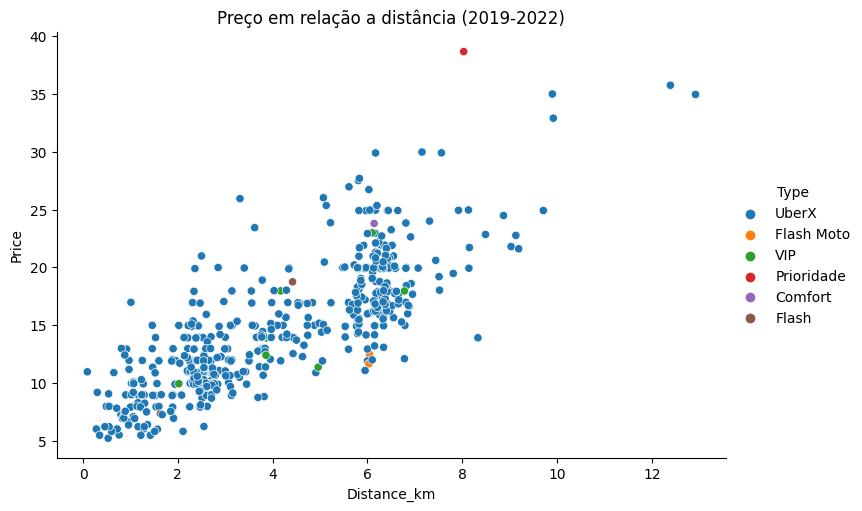

In [167]:
sns.relplot(x="Distance_km",y="Price",data=df_completed,hue='Type',sizes=40,aspect=1.5)

plt.title("Preço em relação a distância (2019-2022)")


In [168]:
help(sns.lmplot)

Help on function lmplot in module seaborn.regression:

lmplot(data=None, *, x=None, y=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None)
    Plot data and regression model fits across a FacetGrid.
    
    This function combines :func:`regplot` and :class:`FacetGrid`. It is
    intended as a convenient interface to fit regression models across
    conditional subsets of a dataset.
    
    When thinking about how to assign variables to different facets, a general
    rule is that it makes sense to use ``hue`` for the most important
    com

Text(0.5, 1.0, 'Preço em relação a distância (2019-2022)')

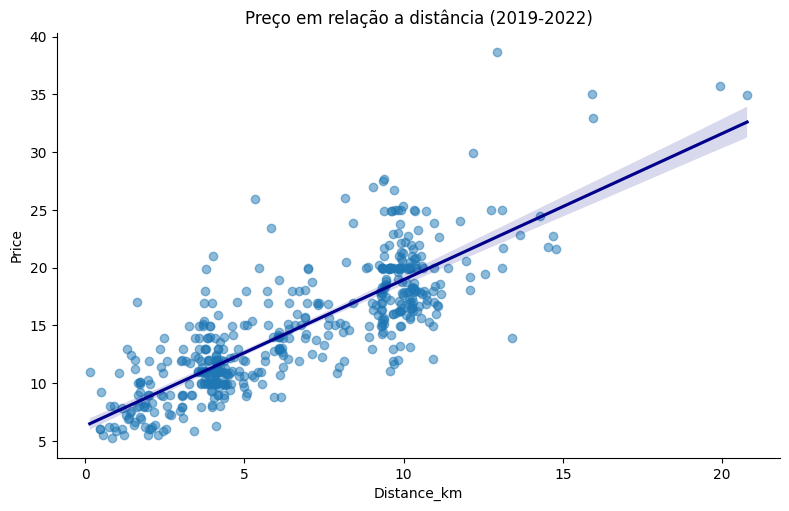

In [171]:
sns.lmplot(x="Distance_km",y="Price",data=df_filtered,line_kws={"color":"darkblue"},scatter_kws={"alpha": 0.5},aspect=1.6)
plt.title("Preço em relação a distância (2019-2022)")

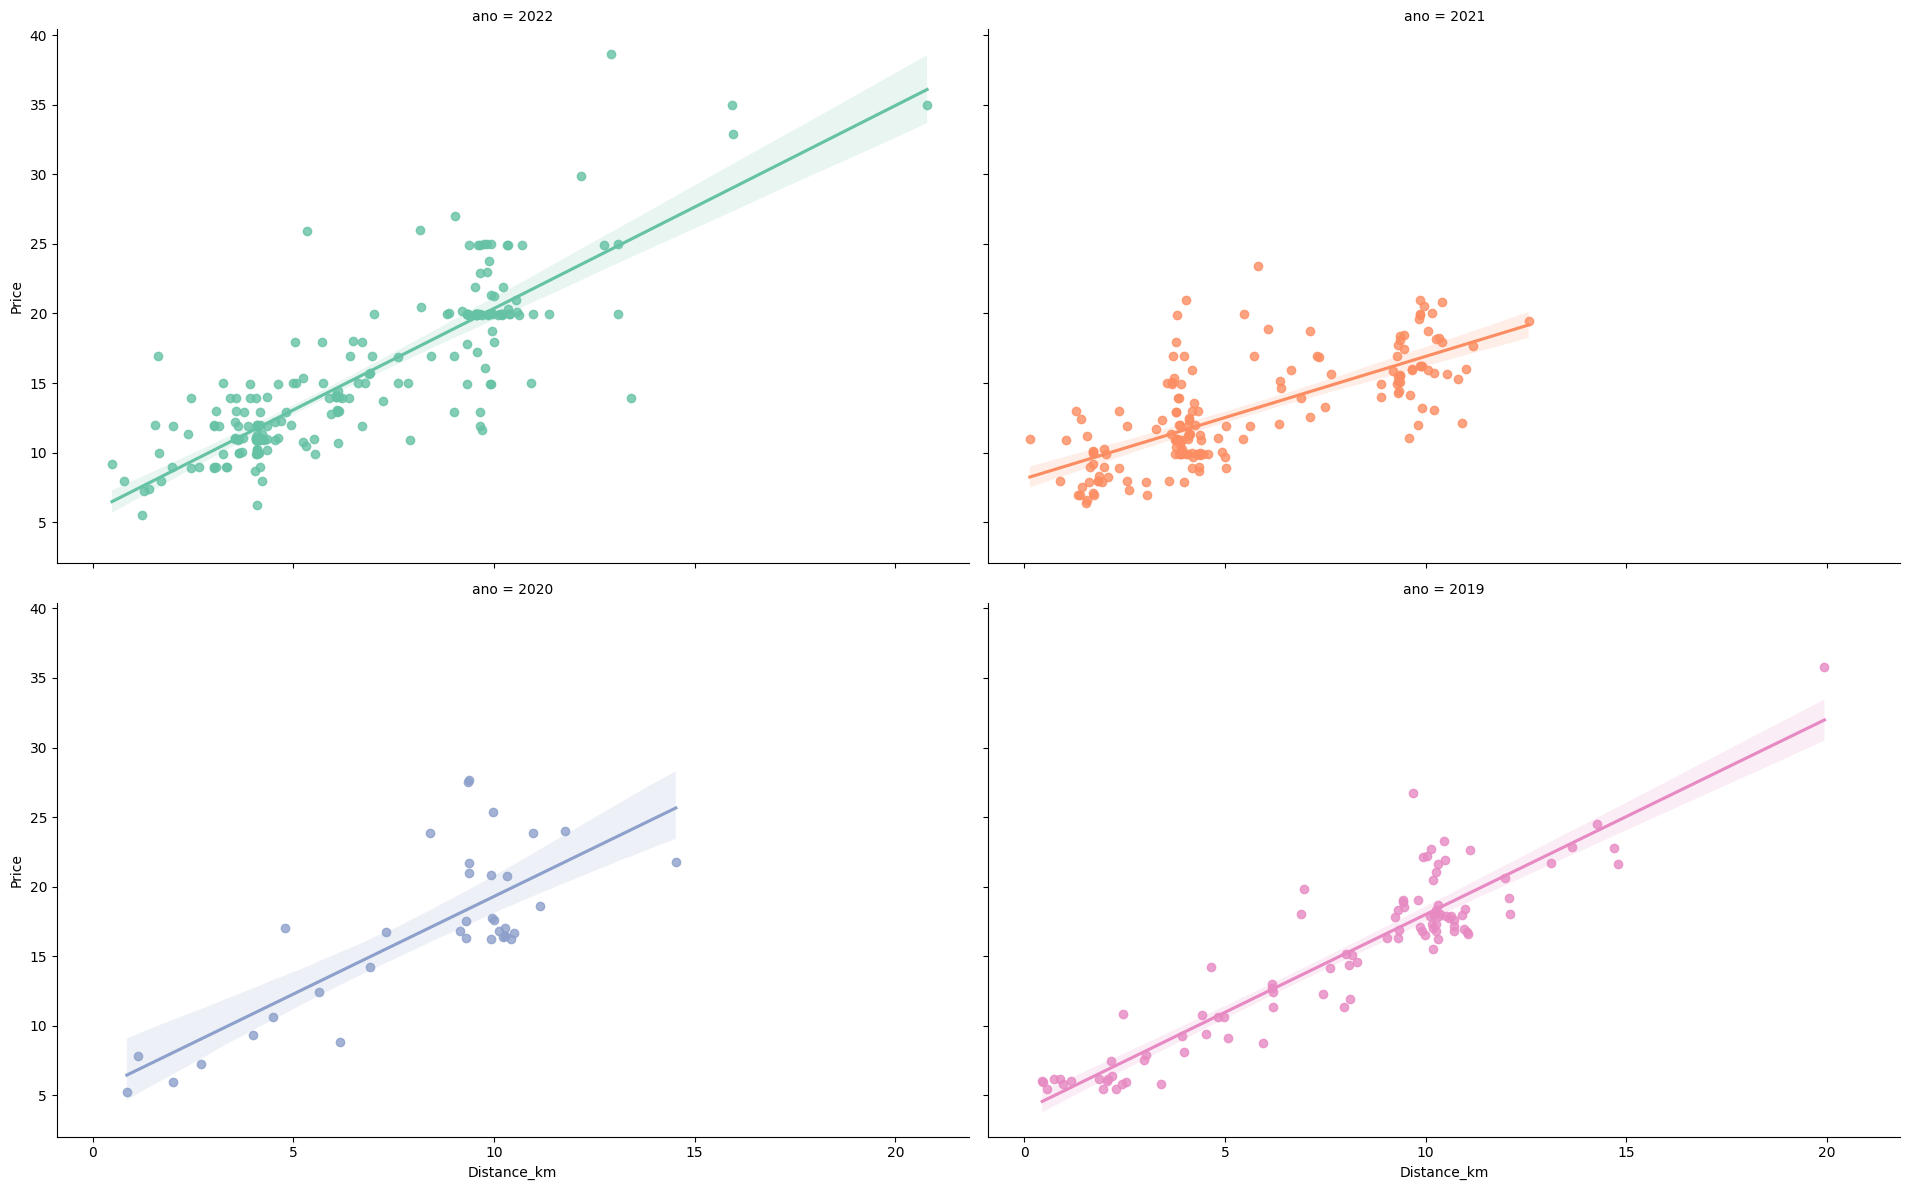

In [174]:
sns.lmplot(x="Distance_km",y="Price",data=df_filtered,col='ano',col_wrap=2,hue='ano',palette="Set2",aspect=1.6,height=6)

c:\Users\Gabriel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Preço em relação a distância (2019-2022)')

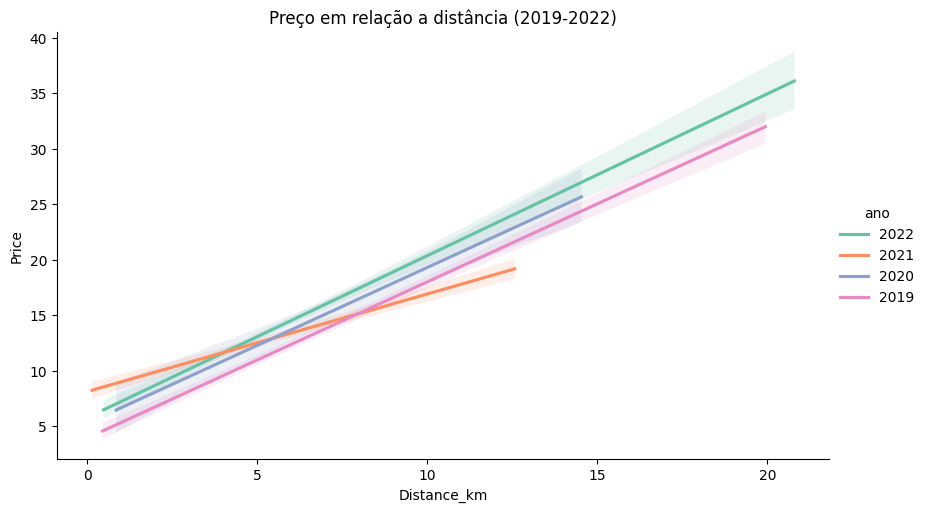

In [175]:
sns.lmplot(x="Distance_km",y="Price",data=df_filtered,hue="ano",palette="Set2",scatter=False,legend_out=True,aspect=1.7)
plt.title("Preço em relação a distância (2019-2022)")



In [125]:
# cria o gráfico lmplot com legendas
sns.lmplot(x="total_bill", y="tip", hue="sex", data=)



NameError: name 'tips' is not defined